In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
data = pd.read_csv("../Feature Selection/mobile-price-classification/train.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [23]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Data Analysis

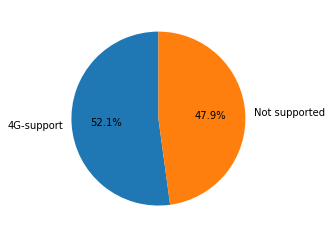

In [29]:
# % of phones with 4G support
lab = ["4G-support",'Not supported']
val = data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(val, labels=lab, autopct='%1.1f%%',startangle=90)
plt.show()

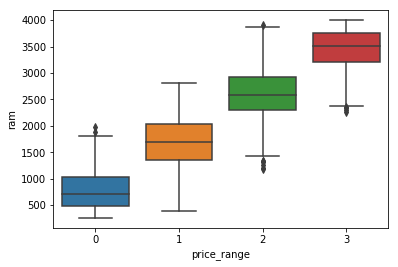

In [30]:
#price vs ram
sns.boxplot(x="price_range", y="ram", data=data)

Text(0.5, 0, 'MegaPixels')

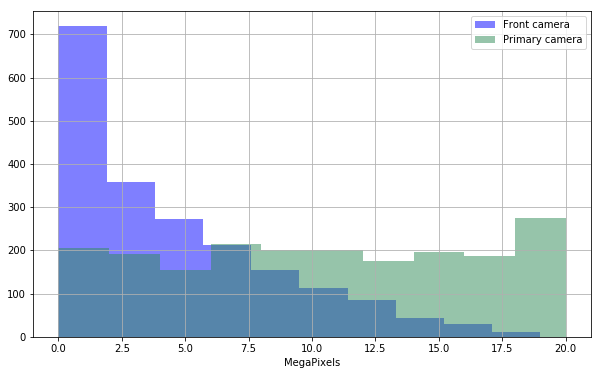

In [33]:
#camera megapixels distribution
plt.figure(figsize=(10,6))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='seagreen',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

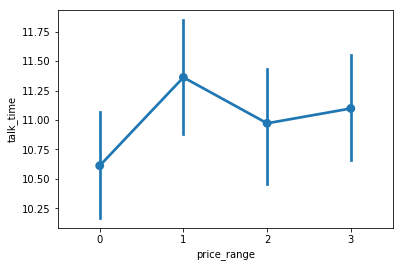

In [35]:
sns.pointplot(y="talk_time", x="price_range", data=data)

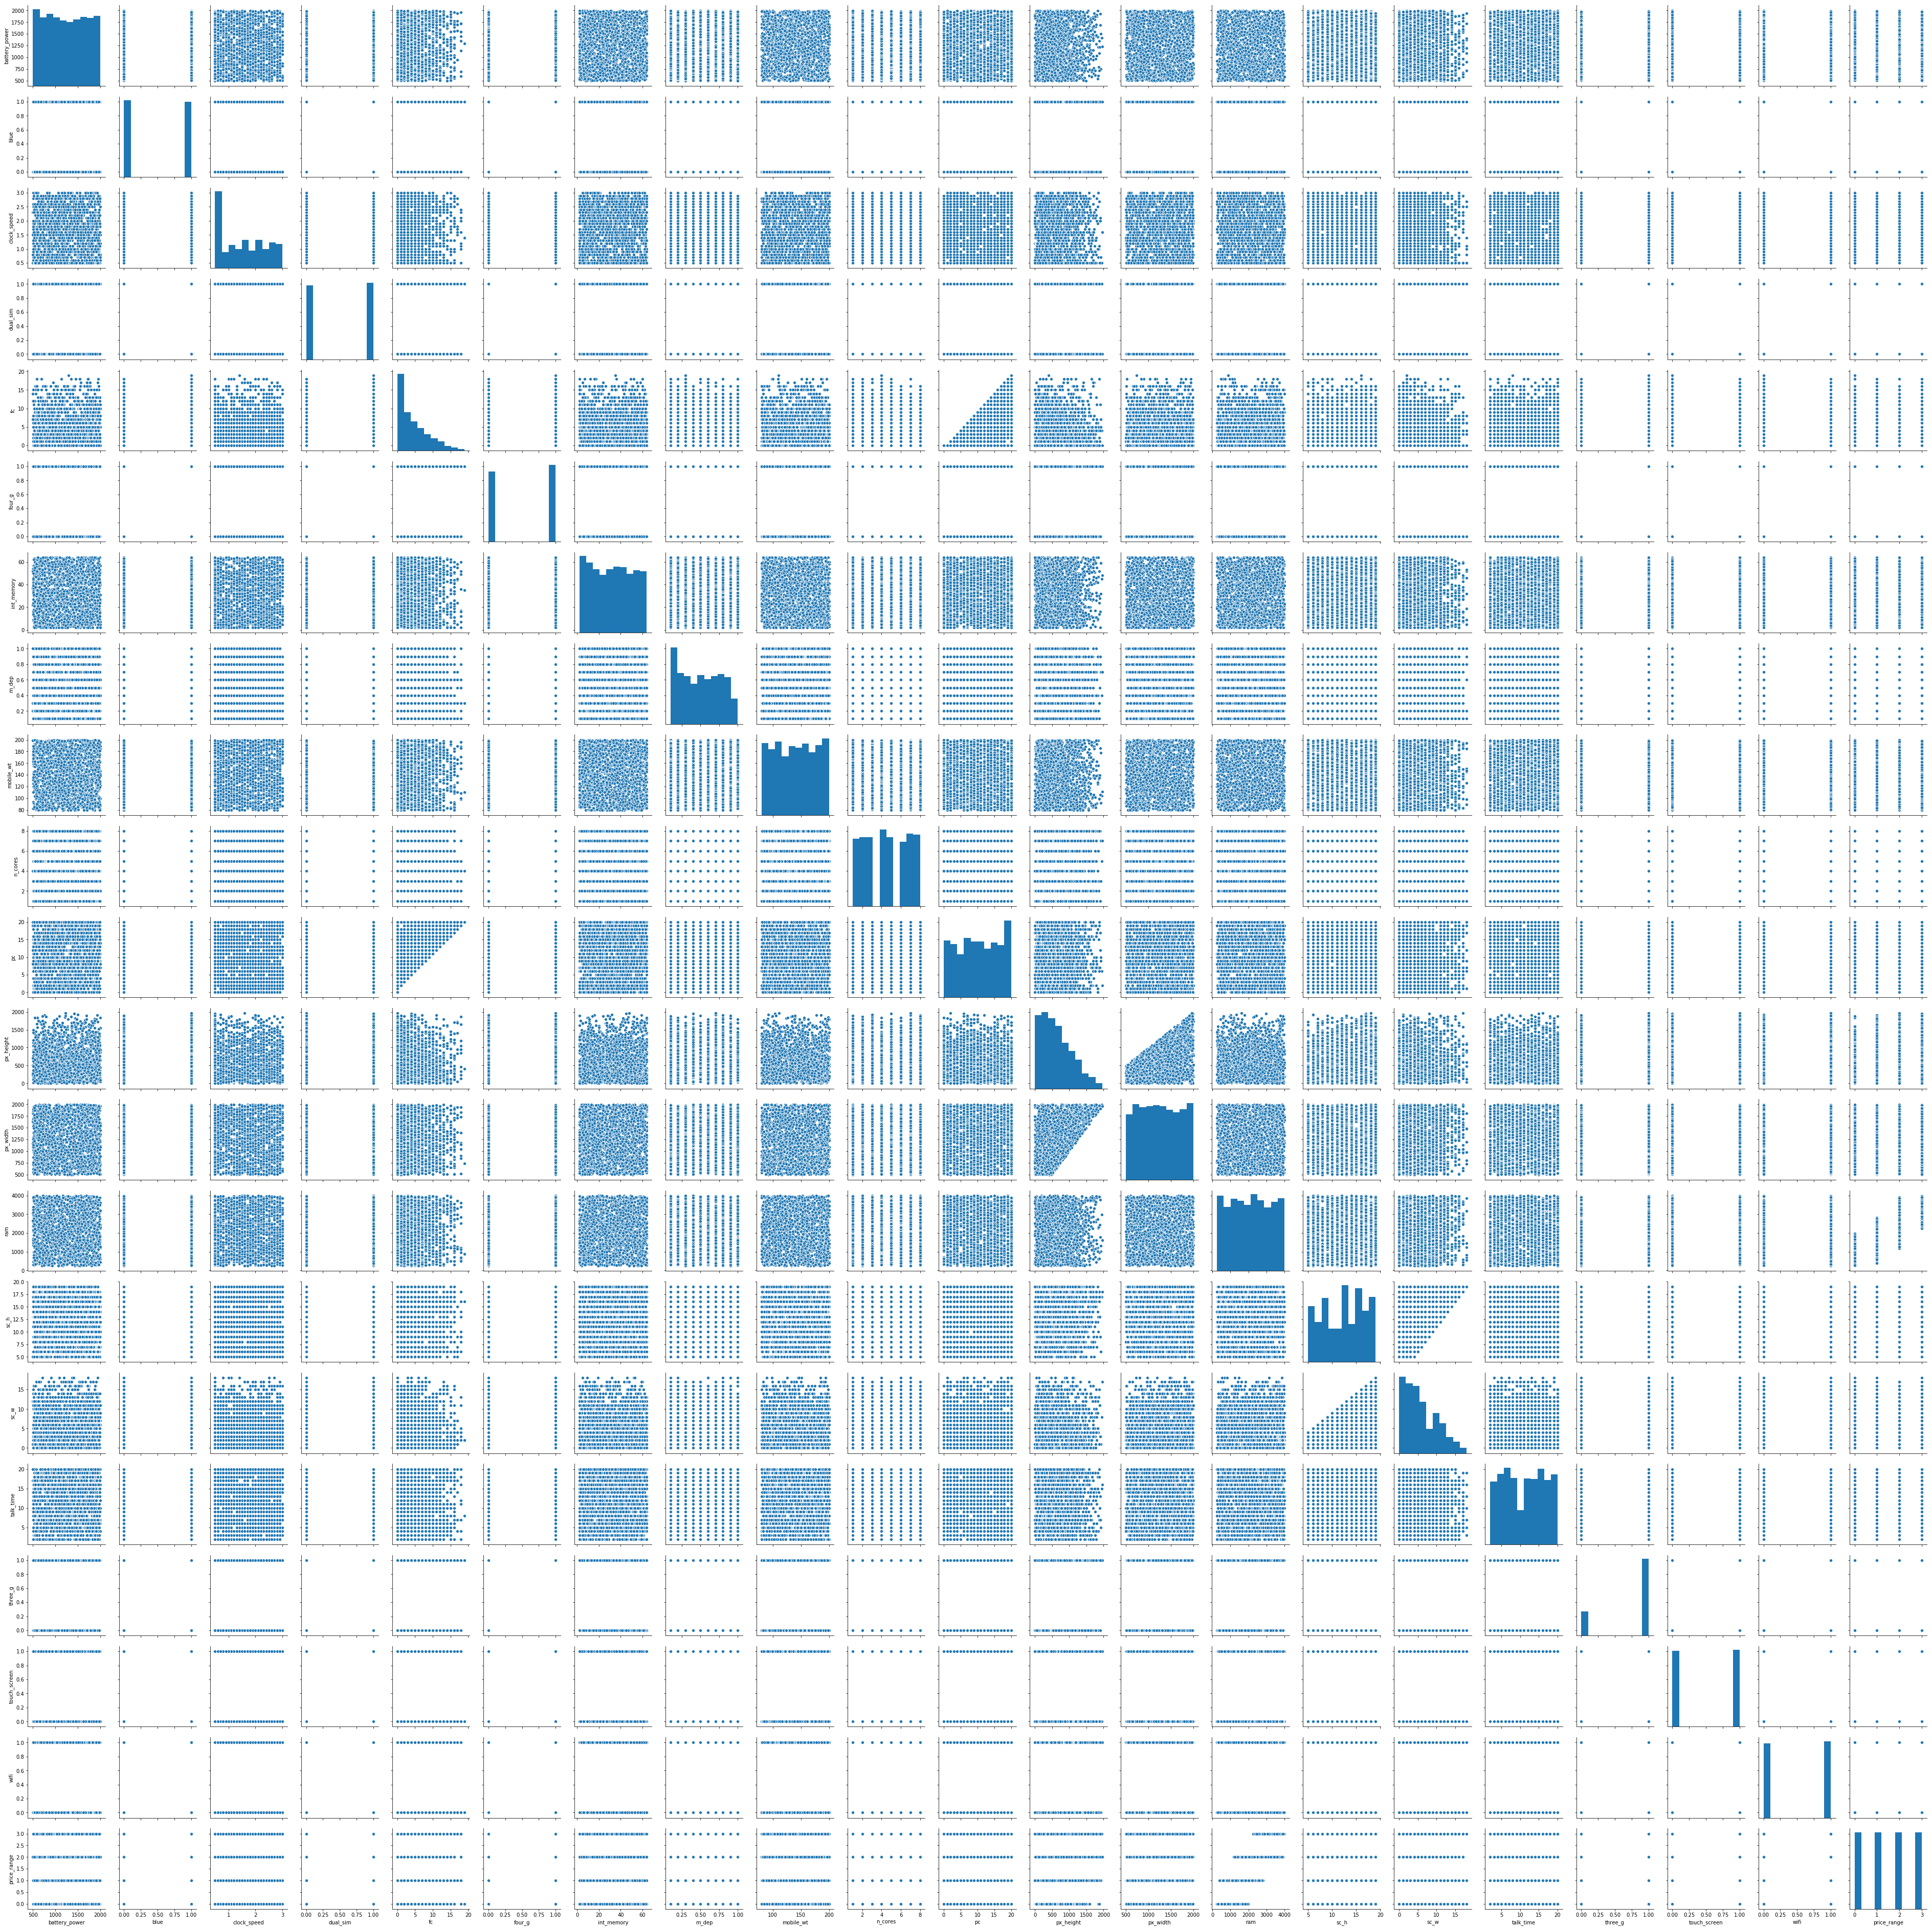

In [24]:
sns.pairplot(data)

### Feature Selection
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix

In [45]:
indep = data.iloc[:,0:20] 
target = data.iloc[:,-1]   

top10features = SelectKBest(score_func=chi2, k=10)
fit = top10features.fit(indep,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(indep.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['Specs','Score']  
print(featurescores.nlargest(10,'Score'))  

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


F:\Setup\WinPython-64bit-3.5.2.3\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0596341  0.02076594 0.0328725  0.0176621  0.03316254 0.01523308
 0.03273893 0.03370187 0.0353466  0.03449398 0.03262984 0.04987049
 0.04667726 0.40222083 0.03388302 0.03328923 0.03455023 0.01362155
 0.0184432  0.01920273]


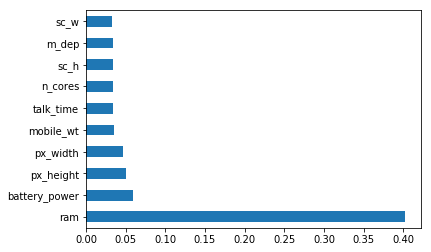

In [26]:
indep = data.iloc[:,0:20] 
target = data.iloc[:,-1]   

model = ExtraTreesClassifier()
model.fit(indep,target)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=indep.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

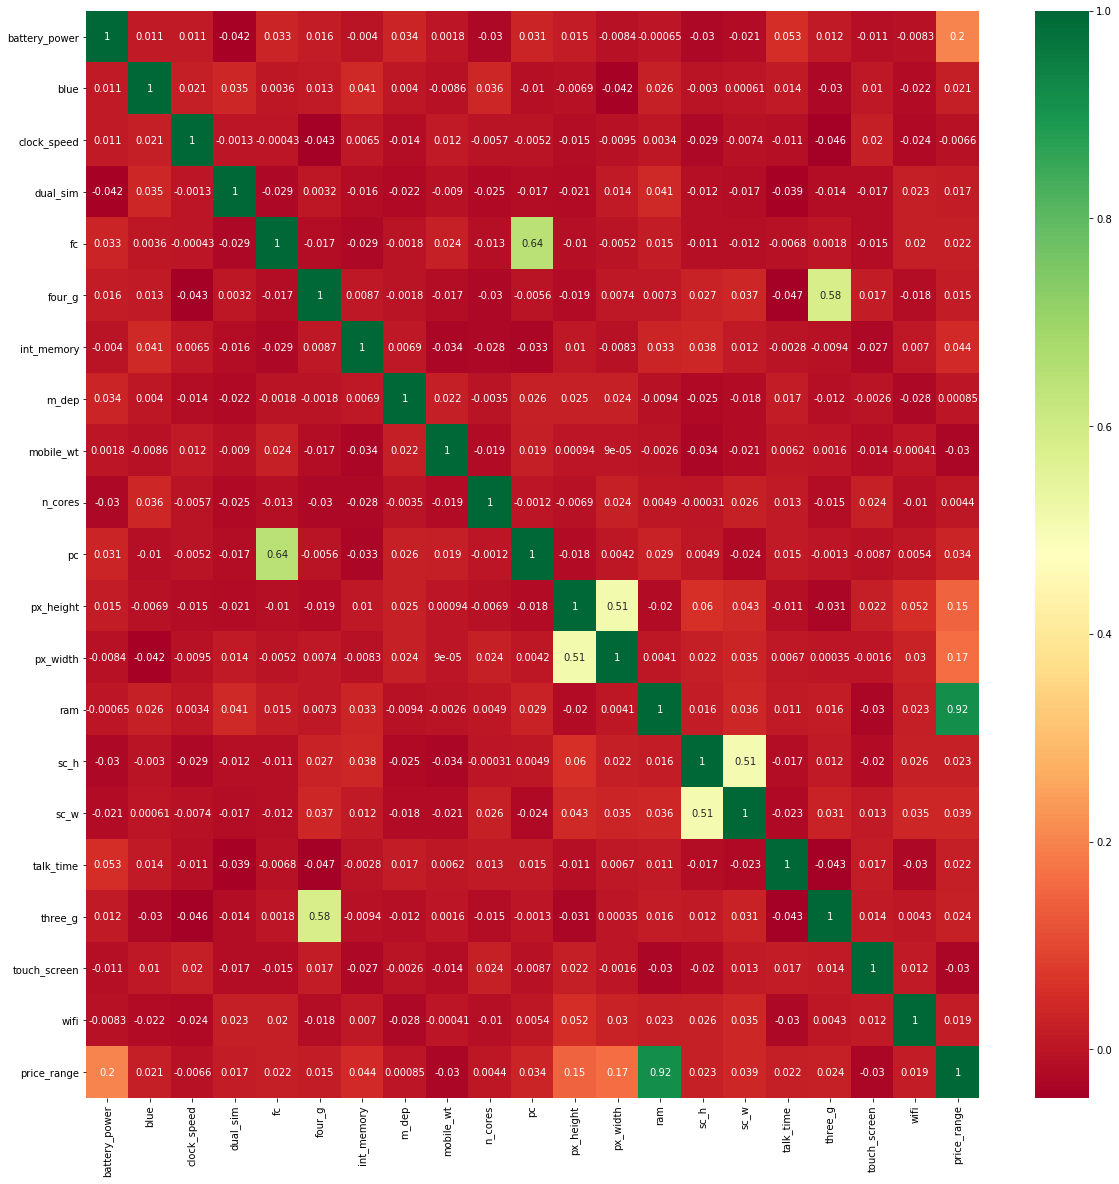

In [27]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Price is correlated with other features with highest correlation with ram.

### Comparing Different Models

In [37]:
df=data.drop('price_range',axis=1)
target=data['price_range']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df_train, df_test, target_train, target_test = train_test_split(df, target, test_size=0.33, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [41]:
lm.fit(df_train,target_train)
lm.score(df_test,target_test)

0.9132801488185277

Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [47]:
lm.fit(df_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lm.score(df_test,target_test)

0.9132801488185277

Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [55]:
logmodel.fit(df_train,target_train)

F:\Setup\WinPython-64bit-3.5.2.3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Setup\WinPython-64bit-3.5.2.3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
logmodel.score(df_test,target_test)

0.7515151515151515

KNN Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(df_train,target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [51]:
knn.score(df_test,target_test)

0.9212121212121213

Text(0, 0.5, 'Error Rate')

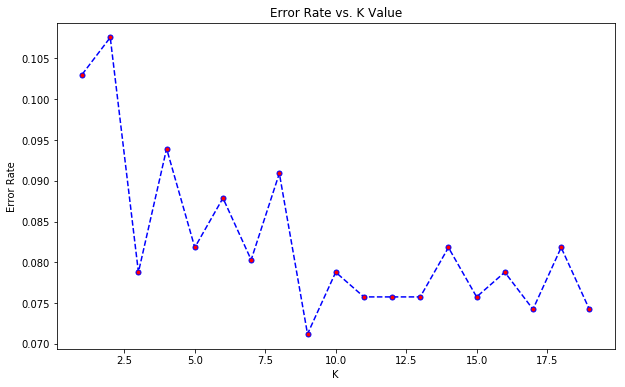

In [53]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_train,target_train)
    pred_i = knn.predict(df_test)
    error_rate.append(np.mean(pred_i != target_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(df_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
dtree.score(df_test,target_test)

0.8136363636363636

Random Tree Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(df_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
rfc.score(df_test,target_test)

0.8757575757575757

Result: We see that KNN and Linear Regression perform the best.

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
pred = knn.predict(df_test)

In [69]:
print(classification_report(target_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [71]:
matrix=confusion_matrix(target_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


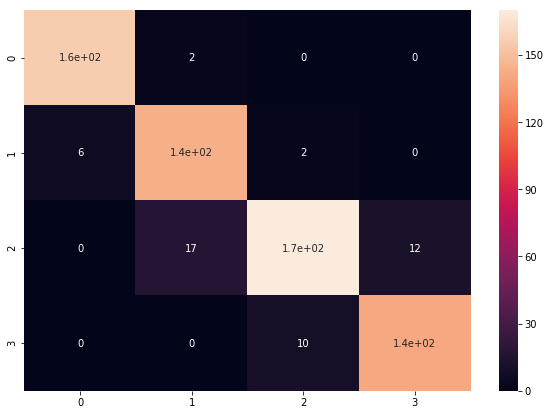

In [72]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [64]:
target_pred=lm.predict(df_test)

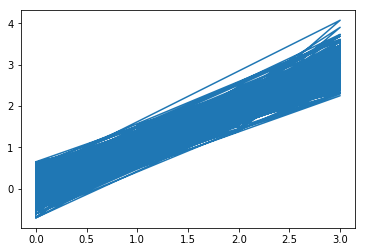

In [66]:
plt.plot(target_test,target_pred)

### Price prediction of Test.csv Using KNN for Prediction

In [73]:
df_test=pd.read_csv("../Feature Selection/mobile-price-classification/test.csv")

In [74]:
df_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [75]:
df_test=df_test.drop('id',axis=1)


In [76]:
df_test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

In [77]:
predicted_price=knn.predict(df_test)

In [78]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [79]:
df_test['price_range']=predicted_price

In [82]:
df_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
5             1464     1          2.9         1   5       1          50   
6             1718     0          2.4         0   1       0          47   
7              833     0          2.4         1   0       0          62   
8             1111     1          2.9         1   9       1          25   
9             1520     0          0.5         0   1       0          25   
10            1500     0          2.2         0   2       0          55   
11            1343     0          2.9         0   2       1          34   
12             900     1          1.4         1   0       0          30   
13            1190     1          2.2         1   5       0          19   
14             630     0          1.8         0   8       1          51   
15            1846     1          1.0         0   5       1          53   
16            1985     0          0.5         1  14       1          26   
17            1042     0          2.9         0   5       1          48   
18            1231     1          1.7         1   2       1          37   
19            1488     0          2.6         0   9       0          37   
20             968     0          0.6         0   8       1           7   
21             529     0          2.6         1   1       0          60   
22            1558     0          1.7         1   7       0          50   
23             533     1          0.7         1  16       0          58   
24            1037     0          1.7         1   1       0           5   
25            1025     0          1.6         1   6       1          43   
26            1858     0          3.0         1   0       0          17   
27             980     0          0.5         0   1       0           8   
28             644     1          0.5         1   9       0          15   
29            1024     1          1.6         1   0       1          38   
..             ...   ...          ...       ...  ..     ...         ...   
970           1247     1          2.1         0  10       1          63   
971           1207     0          1.1         1   9       1          56   
972           1198     1          0.5         1   0       0          31   
973           1796     1          0.5         0   0       0          44   
974           1855     0          1.0         1   8       0          58   
975           1557     1          1.6         0   7       0          26   
976            958     0          0.5         1   0       1          47   
977           1882     1          2.1         1   0       0          17   
978           1489     0          0.5         1   7       0          60   
979           1980     0          0.5         1   7       0          15   
980           1235     0          1.8         1   3       0          21   
981            829     0          2.6         1  11       1          10   
982           1998     1          0.5         0   6       0          47   
983           1814     0          1.6         0   6       1           3   
984           1711     1          0.5         1   1       1          12   
985            971     1          2.1         0   9       0           7   
986            991     0          2.6         0   0       0          19   
987            905     0          1.9         1  11       1          12   
988           1653     1          1.3         0   0       0          49   
989            635     1          1.9         1   0       1          57   
990           1807     0          1.2         0   4       0          37   
991           1797     1      